In [16]:
%matplotlib inline
import sys
sys.path.insert(0, '../')
from skimage.io import imread
import tensorflow as tf
import utils as utils
import matplotlib.pyplot as plt
import os
import numpy as np

## For bug fix
import importlib
importlib.reload(utils)

<module 'utils' from '..\\utils.py'>

### Transfer data to tfrecords

Set the path to low-resolution (input) and high-resolution images (output)

In [17]:
PATH_TO_HR = '../test_data/high_resolution/'
PATH_TO_LR = '../test_data/low_resolution/'
SAVE_DIR = './test_save'
NAME = 'valid_data'

Convert the images to `*.tfrecords` files. Note that each image could have different sizes.

In [18]:
test_data_obj = utils.Data(PATH_TO_LR, PATH_TO_HR, SAVE_DIR, NAME)
input_list, output_list = test_data_obj.get_files()
test_data_obj.convert_to_tfrecord(input_list, output_list)

Writing ./test_save\valid_data.tfrecords
Images are transfered and stored as ./test_save\valid_data.tfrecords


### Validate the transfer

Lets decode the images and plot one pair.

In [19]:
filename = tf.constant(os.path.join(SAVE_DIR, NAME+'.tfrecords'))
dataset = tf.contrib.data.TFRecordDataset(filename)

def _parse_function(example_proto):
    features = {'in_shape': tf.FixedLenFeature([], tf.string),
                'out_shape': tf.FixedLenFeature([], tf.string),
                'in_image_raw': tf.FixedLenFeature([], tf.string),
                'out_image_raw': tf.FixedLenFeature([], tf.string)}
    parsed_features = tf.parse_single_example(example_proto, features)
    in_shape = tf.decode_raw(parsed_features["in_shape"], tf.int32)
    in_image = tf.decode_raw(parsed_features["in_image_raw"], tf.int32)
    out_shape = tf.decode_raw(parsed_features["out_shape"], tf.int32)
    out_image = tf.decode_raw(parsed_features["out_image_raw"], tf.int32)
    
    in_image = tf.reshape(in_image, in_shape)
    out_image = tf.reshape(out_image, out_shape)
    
    return in_image, out_image

In [21]:
dataset = dataset.map(_parse_function)
batched_dataset = dataset.batch(1)          # Since the images has different shapes, the batch set to 1.
iterator = batched_dataset.make_one_shot_iterator()
next_element = iterator.get_next()
sess = tf.InteractiveSession()
out = sess.run(next_element)
image_tf = out[0].squeeze()

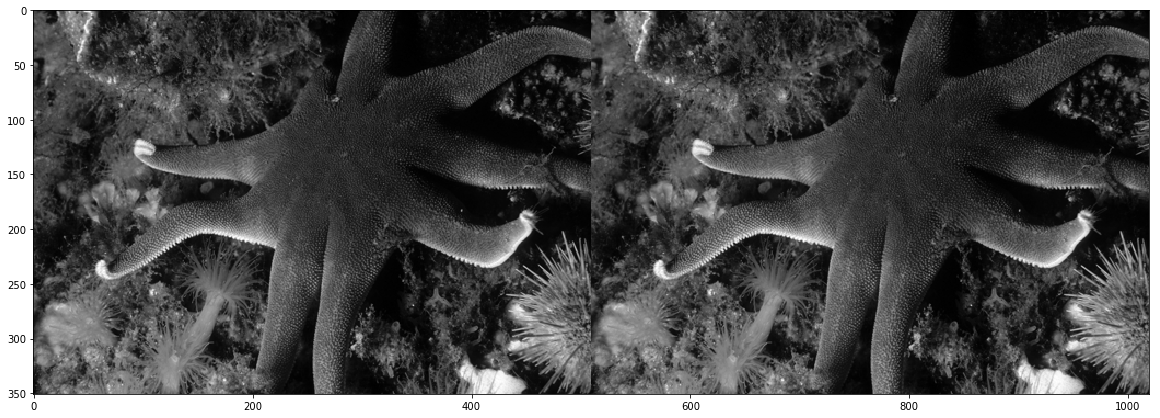

In [175]:
image_1 = imread('../test_data/low_resolution/0001.png')
plt.figure(figsize=(20, 40))
plt.imshow(np.concatenate([image_1, image_tf], axis=1), cmap='gray')

### Test the data preprocessing
Define another function to perform the preprocessing by transform the `dataset`.

In [166]:
CROP_SIZE_INPUT = 32
CROP_SIZE_OUTPUT = CROP_SIZE_INPUT * 4
def _preprocessing_function(in_image, out_image):
    
#     _, h, w, _ = in_image.get_shape()
    
#     h_offset_in = tf.cast(tf.random_uniform(shape=0, maxval=h - CROP_SIZE_INPUT), tf.int32)
#     w_offset_in = tf.cast(tf.random_uniform(shape=0, maxval=w - CROP_SIZE_INPUT), tf.int32)
    
#     h_offset_out = tf.scalar_mul(4, h_offset_in)
#     w_offset_out = tf.scalar_mul(4, w_offset_in)
    
#     cropped_in_image = tf.image.crop_to_bounding_box(in_image, h_offset_in,
#                                                      w_offset_in, CROP_SIZE_INPUT, CROP_SIZE_INPUT)
#     cropped_out_image = tf.image.crop_to_bounding_box(out_image, h_offset_out,
#                                                       w_offset_out, CROP_SIZE_OUTPUT, CROP_SIZE_OUTPUT)
    
    t_shape_in = tf.shape(in_image)
    maxval = tf.cast(tf.subtract(tf.slice(t_shape_in, [0], [1]),
                                 tf.constant(CROP_SIZE_INPUT, dtype=tf.int32)),
                     tf.float32)
    h_offset_in = tf.cast(tf.random_uniform(shape=[1], maxval=maxval), tf.int32)
#     maxval = tf.cast(tf.subtract(tf.slice(t_shape_in, [0], [1]),
#                                  tf.constant(CROP_SIZE_INPUT, dtype=tf.int32)),
#                      tf.float32)
#     w_offset_in = tf.cast(tf.random_uniform(shape=[1], maxval=maxval), tf.int32)

                         
#     h_offset_out = tf.scalar_mul(4, h_offset_in)
#     w_offset_out = tf.scalar_mul(4, w_offset_in)
#     print(h_offset_out)
#     print(h_offset_in)
#     h_offset_in = tf.slice(h_offset_in, [0], [1])
#     print(h_offset_in)

#     return h_offset_out, h_offset_in
#     h_offset_in = tf.reshape(h_offset_in, [-1])
#     h_offset_in = tf.Variable(h_offset_in)
#     h_offset_in = tf.constant(tf.slice(h_offset_in, [0], [1]))
#     w_offset_in = tf.constant(tf.slice(h_offset_in, [0], [1]))
    
#     h_offset_in = tf.Variable(
#         tf.random_uniform(shape=[1], maxval=maxval), dtype=tf.float32)

    
    
    return h_offset_in
        
#     cropped_in_image = tf.image.crop_to_bounding_box(in_image, h_offset_in,
#                                                      w_offset_in, CROP_SIZE_INPUT, CROP_SIZE_INPUT)
#     cropped_out_image = tf.image.crop_to_bounding_box(out_image, h_offset_out,
#                                                       w_offset_out, CROP_SIZE_OUTPUT, CROP_SIZE_OUTPUT)
            
#     return cropped_in_image
#     return cropped_in_image, cropped_out_image

In [167]:
dataset = tf.contrib.data.TFRecordDataset(filename)
dataset = dataset.map(_parse_function)
dataset = dataset.map(_preprocessing_function)

In [168]:
batched_dataset = dataset.batch(1)
iterator = batched_dataset.make_one_shot_iterator()
next_item = iterator.get_next()